## **Importando bibliotecas**

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, initializers
import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns   #para plotar matriz de confusão

from keras.callbacks import ModelCheckpoint

## **Importando dados (CIFAR10)**

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [4]:
train_images.shape

(50000, 32, 32, 3)

In [5]:
test_images.shape

(10000, 32, 32, 3)

In [6]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

## **Exibindo algumas imagens**

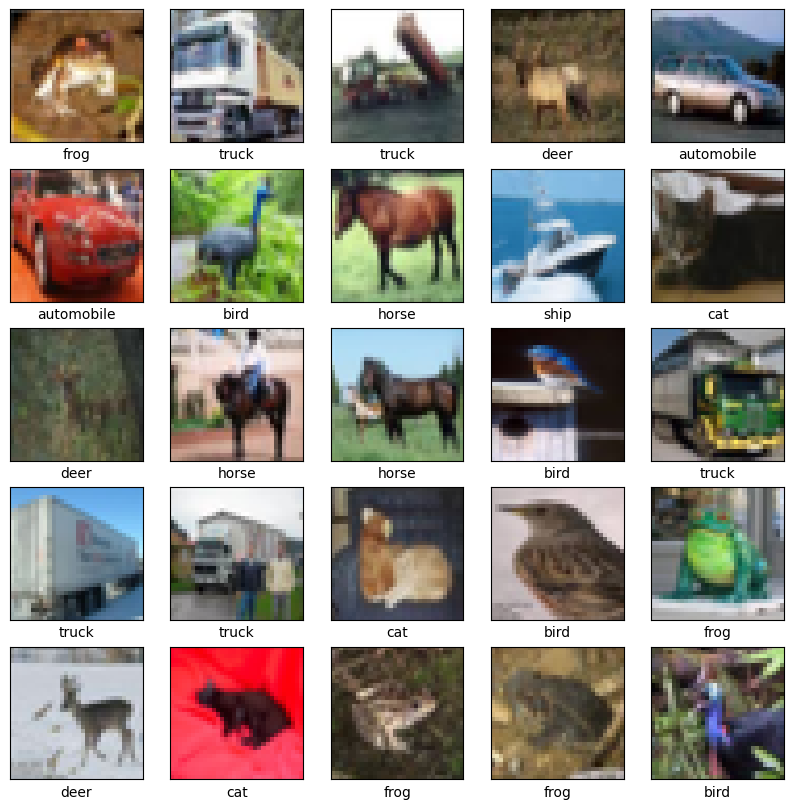

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1) # 5 linhas e 5 colunas de imagens
    plt.xticks([]) #não plota valores em x
    plt.yticks([]) #não plota valores em y
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## **Semente de randomização**

In [15]:
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

## **Modelo da rede (CNN)**

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

## **Otimizador**

In [17]:
#opt = tf.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
opt = 'Adam'

model.compile(optimizer=opt, loss = 'SparseCategoricalCrossentropy', metrics=['accuracy'])

## **Salva melhor conjunto de validação**

In [18]:
checkpoint_filepath = '/tmp/best_valid.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

## **Treinamento**

In [19]:
history = model.fit(train_images, train_labels, epochs=50, batch_size = 1024, validation_data=(test_images, test_labels), callbacks=[model_checkpoint_callback])

Epoch 1/50
49/49 [==============================] - 4s 29ms/step - loss: 10.0095 - accuracy: 0.1218 - val_loss: 2.2215 - val_accuracy: 0.1945
Epoch 2/50
49/49 [==============================] - 1s 19ms/step - loss: 2.0953 - accuracy: 0.2414 - val_loss: 1.9770 - val_accuracy: 0.2820
Epoch 3/50
49/49 [==============================] - 1s 20ms/step - loss: 1.8187 - accuracy: 0.3491 - val_loss: 1.6775 - val_accuracy: 0.3964
Epoch 4/50
49/49 [==============================] - 1s 21ms/step - loss: 1.5579 - accuracy: 0.4454 - val_loss: 1.5650 - val_accuracy: 0.4434
Epoch 5/50
49/49 [==============================] - 1s 20ms/step - loss: 1.4380 - accuracy: 0.4874 - val_loss: 1.4189 - val_accuracy: 0.4923
Epoch 6/50
49/49 [==============================] - 1s 21ms/step - loss: 1.3449 - accuracy: 0.5231 - val_loss: 1.3585 - val_accuracy: 0.5197
Epoch 7/50
49/49 [==============================] - 1s 22ms/step - loss: 1.2819 - accuracy: 0.5449 - val_loss: 1.3168 - val_accuracy: 0.5371
Epoch 8/50
4

In [20]:
pred_images = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


## **Exibindo a acurácia da rede final**

In [21]:
_, train_acc = model.evaluate(train_images, train_labels, verbose=0)
_, test_acc = model.evaluate(test_images, test_labels, verbose=0)

print(train_acc, test_acc)

0.902239978313446 0.6212000250816345


## **Exibindo a acurácia da nelhor rede para o conjunto de teste**

In [22]:
model.load_weights(checkpoint_filepath)

pred_images = model.predict(test_images)

_, train_acc = model.evaluate(train_images, train_labels, verbose=0)
_, test_acc = model.evaluate(test_images, test_labels, verbose=0)

print(train_acc, test_acc)

313/313 [==============================] - 1s 2ms/step
0.8118199706077576 0.6330000162124634


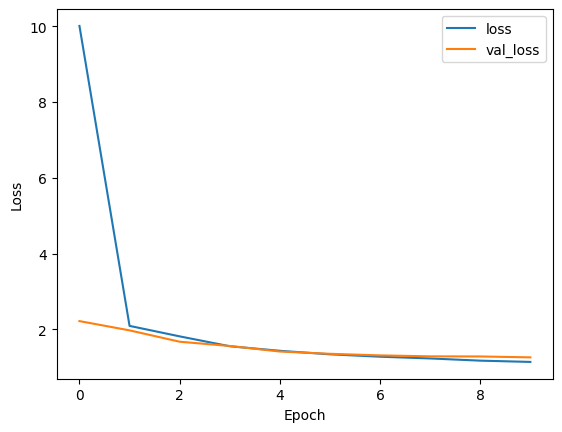

In [23]:
plt.plot(history.history['loss'][0:10], label='loss')
plt.plot(history.history['val_loss'][0:10], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0, 6])
plt.legend(loc='upper right')

## **Plotando histórico da acurácia**

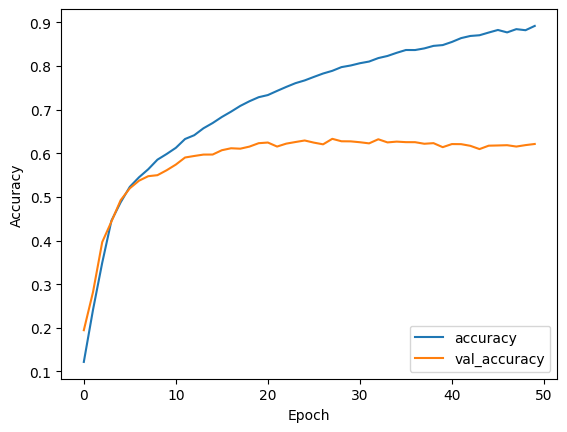

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0, 1])
plt.legend(loc='lower right')


In [25]:
print(pred_images)

[[4.5777895e-03 1.2673901e-03 1.4592955e-02 ... 7.7100820e-04
  7.5741269e-02 1.5853643e-03]
 [1.4041479e-03 5.6038234e-02 3.6245609e-10 ... 4.5653894e-09
  9.4245994e-01 9.7647768e-05]
 [4.0224288e-02 1.3139840e-02 9.5701736e-04 ... 2.9803242e-04
  9.1249901e-01 2.9097019e-02]
 ...
 [6.4141936e-06 1.0234210e-06 6.4304225e-02 ... 5.1472965e-03
  1.6066575e-06 2.9456523e-06]
 [5.1187305e-03 1.5377434e-03 3.5150570e-03 ... 4.1564773e-03
  2.1804628e-04 5.7278918e-03]
 [9.6311815e-06 4.8096382e-07 7.6510887e-06 ... 9.8722583e-01
  4.5167312e-08 3.9026414e-05]]


tf.Tensor(
[[666  25  72  25  35   8  13  16  92  48]
 [ 38 720   5  13  12   7  13   5  54 133]
 [ 85   6 458  69 131  99  57  62  15  18]
 [ 18  15  73 424  91 192  68  62  27  30]
 [ 31   6  57  72 595  44  53 114  16  12]
 [ 18   7  73 171  54 551  26  75  16   9]
 [  9   9  53  68  64  36 710  17  13  21]
 [ 21   8  42  52  66  57   9 717   5  23]
 [108  41  24  23  14  13   9   6 721  41]
 [ 35  78  14  11  10   8   7  25  44 768]], shape=(10, 10), dtype=int32)


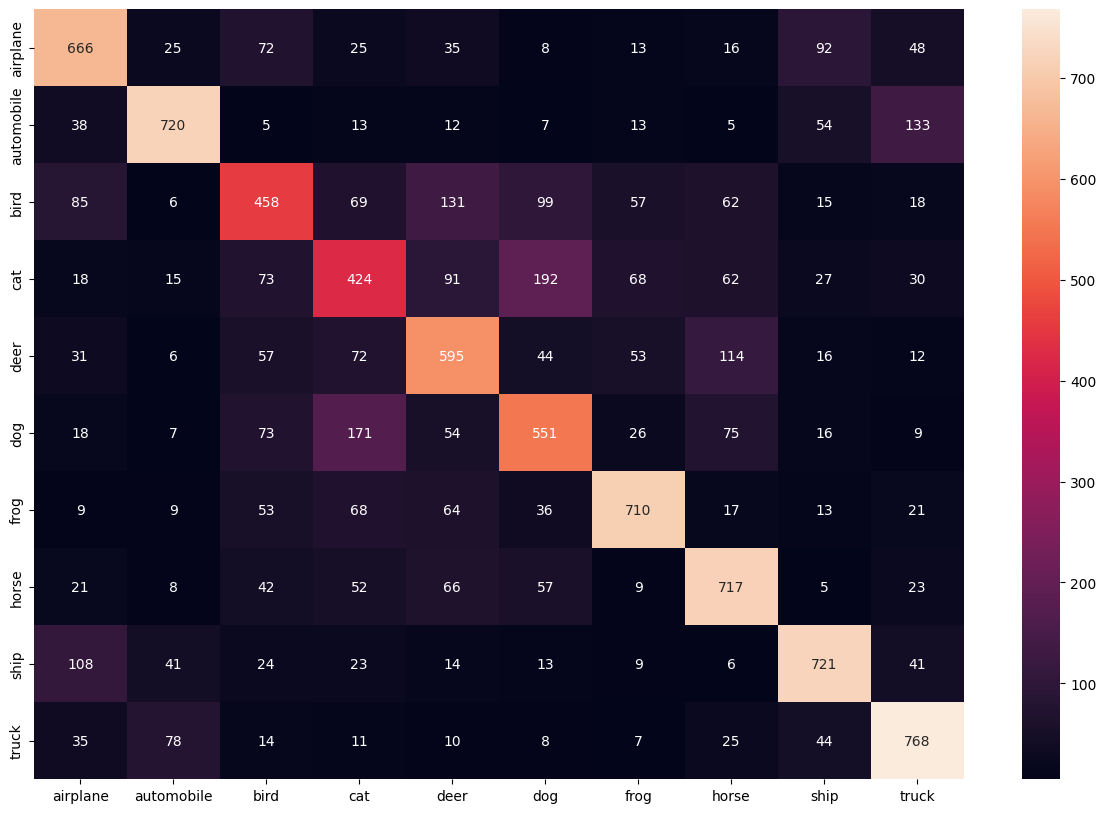

In [26]:
# Convert predictions classes to one hot vectors
pred_image_labels = np.argmax(pred_images,axis = 1)
confusion_mtx = tf.math.confusion_matrix(test_labels, pred_image_labels)
print(confusion_mtx)

plt.figure(figsize=(15, 10))

c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=class_names, yticklabels=class_names)

plt.show()

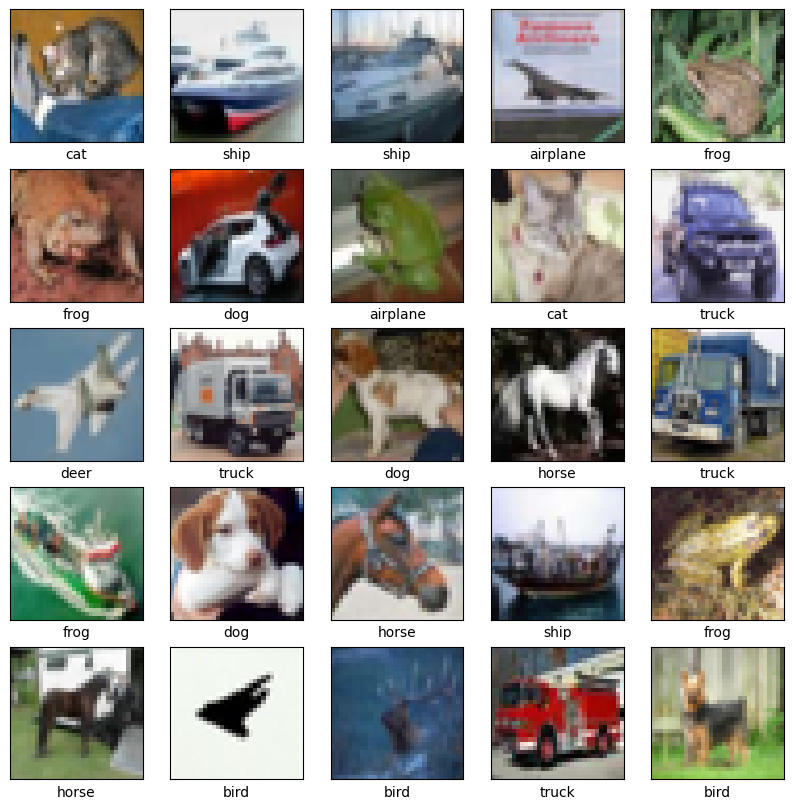

In [27]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1) # 5 linhas e 5 colunas de imagens
    plt.xticks([]) #não plota valores em x
    plt.yticks([]) #não plota valores em y
    #plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)

    plt.xlabel(class_names[pred_image_labels[i]])
plt.show()